In [43]:
import pandas as pd

def pandas_groupby(data, groupby_key):
    start=time()
    temp=[row for i,row in data.groupby(by=groupby_key)]
    return time()-start, temp

In [44]:
import itertools as it
from operator import itemgetter

def iter_groupby(data, args):
    start=time()
    cols=data.columns
    array=data.values
    key_func=itemgetter(*args)
    array = sorted(array, key=key_func)
    temp = [list(g) for k, g in it.groupby(array, key=key_func)]
    return time()-start, temp

In [45]:
import numpy as np
from time import time


In [46]:
dfs={}
for key_num in range(1,4):
    pa_time=[]
    li_time=[]
    kumiawase=[]
    groupby_num=[]
    for i in range(1,6):
        i_num=10**i
        for j in range(1,6):
            j_num=10**j
            data = pd.DataFrame(np.random.randint( 1, j_num, (i_num,key_num)))
            times, ret=pandas_groupby(data,[ii for ii in range(key_num)])
            pa_time.append(times)

            times, ret2=iter_groupby(data, [ii for ii in range(key_num)])
            li_time.append(times)
            groupby_num.append(len(ret))
            kumiawase.append((i_num,j_num))
    df=pd.DataFrame([pa_time,li_time,kumiawase, groupby_num]).T
    df=df.rename(columns={0:"pandas", 1:"iter", 2:"kumi",3:"groupby_num"})
    dfs[key_num]=df

In [47]:
def parse(data):
    return pd.Series([data[0], data[1]])

In [49]:
for key_num in range(1,4):
    dfs[key_num][["1","2"]] = dfs[key_num]["kumi"].apply(parse)

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

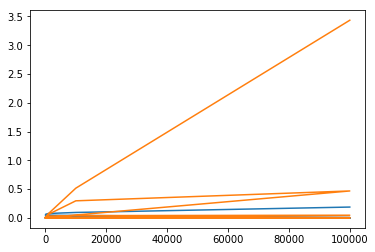

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dfs[1]["2"], dfs[1]["iter"], label="iter")
ax.plot(dfs[1]["2"], dfs[1]["pandas"], label="pandas")

In [87]:
a=dfs[1]

In [88]:
a[a["pandas"]>a["iter"]]

,pandas,iter,kumi,groupby_num,1,2
0,0.00196433,0,"(10, 10)",5,10,10
1,0.00199676,0,"(10, 100)",10,10,100
2,0.00125957,0,"(10, 1000)",10,10,1000
6,0.0177863,0,"(100, 100)",64,100,100
7,0.00598383,0,"(100, 1000)",96,100,1000
8,0.00598717,0,"(100, 10000)",98,100,10000
9,0.00498772,0,"(100, 100000)",100,100,100000
10,0.000995159,0,"(1000, 10)",9,1000,10
11,0.00498843,0.000994921,"(1000, 100)",99,1000,100
12,0.0319448,0,"(1000, 1000)",611,1000,1000
